In [1]:
import os
os.getcwd()

'C:\\Users\\dell'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To laod Dataset 
df=pd.read_csv("titanic.csv")
#To show first 5 records
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [4]:
#To remove unwanted column from given dataframe df,use inbuiltmethod of
#pandas library : drop()
df.drop(["PassengerId","Name"],axis=1,inplace=True)
#inplace=True means take permanent action in dataframe

In [5]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  
0   NaN        S  
1   C85        C  
2   NaN        S  
3  C123        S  
4   NaN        S

In [6]:
#The Goal : Predict whether a passenger survived or not .
# 0 for not surviving 
#1 for surviving

In [7]:
#here output/target variable in this dataset : Survived 
#How many samples of 0's and 1's in Survived column 
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

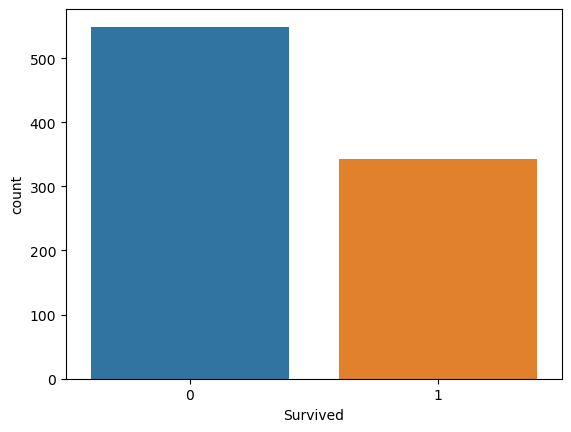

In [8]:
#visualise 
sns.countplot(data=df,x="Survived")
plt.show()

In [9]:
#How many rows and columns in given dataset 
df.shape

(891, 10)

In [10]:
#Preprocessing 
#To check null values in given dataset 
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

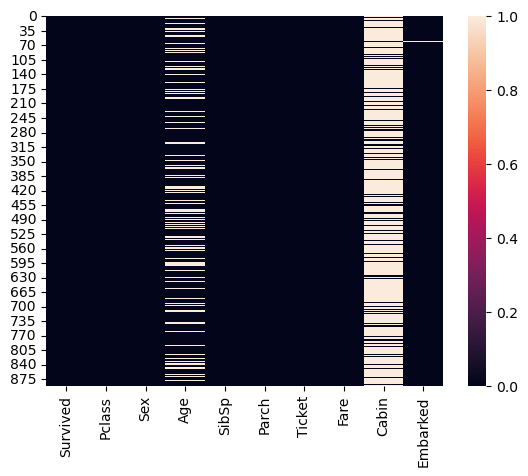

In [11]:
#visulaize null values
sns.heatmap(df.isnull())
plt.show()

In [12]:
#To remove Cabin column from inbuilt dataset permanently because this 
#column is null above 50% and this column is not important to predict the 
#output
df.drop("Cabin",axis=1,inplace=True)
#df.head()

In [13]:
#To delete Ticket column permanently from given dataset 
df.drop('Ticket',axis=1,inplace=True)

In [14]:
#to check the data type of each column , use inbuilt attributes dtypes
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [15]:
#To fill null values of Age with mean of Age column permanently in 
#given dataset 
m=df['Age'].mean().round(2)
print("Mean of Age : ",m)

df['Age'].fillna(m,inplace=True)

Mean of Age :  29.7


In [16]:
#to check null values in given dataset 
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
#To fill null values with 'S'  in Embarked column permanently
df['Embarked'].fillna('S',inplace=True)

In [19]:
#check again null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

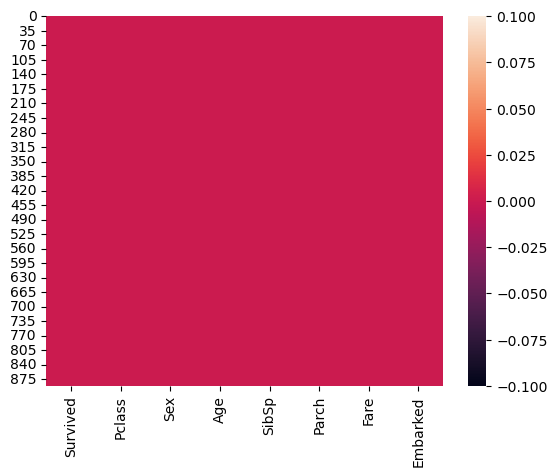

In [20]:
#visualise null values 
sns.heatmap(df.isnull())
plt.show()

In [21]:
#To check duplicates rows /records in given dataset
df.duplicated().sum()

111

In [22]:
#to show all duplicates rows 
df[df.duplicated()]

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
47          1       3  female  29.7      0      0   7.7500        Q
76          0       3    male  29.7      0      0   7.8958        S
77          0       3    male  29.7      0      0   8.0500        S
87          0       3    male  29.7      0      0   8.0500        S
95          0       3    male  29.7      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
870         0       3    male  26.0      0      0   7.8958        S
877         0       3    male  19.0      0      0   7.8958        S
878         0       3    male  29.7      0      0   7.8958        S
884         0       3    male  25.0      0      0   7.0500        S
886         0       2    male  27.0      0      0  13.0000        S

[111 rows x 8 columns]

In [23]:
#to delete duplicates rows permanently in given dataset 
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(780, 8)

In [25]:
#to check datatypes in given dataframe
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [26]:
df['Sex'].unique()  #female : 0  and male : 1

array(['male', 'female'], dtype=object)

In [27]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
#handle categorical type data : means to converts object type data into
#numeric type 
#use LabelEncoder class 
from sklearn.preprocessing import LabelEncoder
#create the object of LabelEncoder class
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [29]:
#check datatypes
df.dtypes 

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [30]:
#select input and output from given dataset
X=df.drop("Survived",axis=1) #select input 
Y=df['Survived']#output 

In [31]:
X.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2

In [32]:
#train test split : 70%-30% 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                              random_state=1)

In [33]:
#APply Scaling on input column 
#use StandardScaler class
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [34]:
X_train

array([[-0.29467341,  0.75131213, -0.86195715, ..., -0.49754356,
        -0.40941332,  0.59855692],
       [-1.47770049,  0.75131213,  1.16521637, ..., -0.49754356,
         0.51391664,  0.59855692],
       [-0.29467341, -1.33100473, -0.21036566, ..., -0.49754356,
        -0.392963  , -1.84947363],
       ...,
       [ 0.88835367,  0.75131213, -0.28276472, ..., -0.49754356,
        -0.38154188, -1.84947363],
       [ 0.88835367,  0.75131213, -0.01488822, ..., -0.49754356,
        -0.51961876,  0.59855692],
       [ 0.88835367,  0.75131213, -0.64475999, ..., -0.49754356,
        -0.50428583,  0.59855692]])

In [40]:
#X_train,Y_train   : 70% train the model
#X_test ,Y_test  : 30% data , test the model 
#USe Classification Algorithm : 

#create user defined function 
def create_model(model):
    #train the model with 70% data
    model.fit(X_train,Y_train)
    #Test the model with 30% data 
    Y_pred=model.predict(X_test)
    #Generate report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [36]:
#first use LogisticRegression Algorithm 
from sklearn.linear_model import LogisticRegression

In [37]:
#create object of LogisticRegression class
lr=LogisticRegression()

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
#sigmoid function : 'S' shaped curve , return answer in probability's 
#value (0-1)
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       125
           1       0.78      0.69      0.73       109

    accuracy                           0.76       234
   macro avg       0.77      0.76      0.76       234
weighted avg       0.77      0.76      0.76       234

[[104  21]
 [ 34  75]]


In [ ]:
#Concusion : Logistic regression is not valid because this algorithm is 
#not select any features from given dataset to predict the output 


In [ ]:
#use second Algorithm : DecisionTreeClassifier  
#It is used to select important features to predict the output 
#with the help of gini index or entropy
##formula of  gini index :  1-P(yes)**2-Q(no)**2
#P means probability of yes
#Q means probablity of no

#work of gini index : find the impurities /error of features 
#if error is large of input features to find the output , means this input
#feature is not important/less imp to predict the output

#if error is low of input features to find the output , means this input
#feature is  important/most imp to predict the output


In [ ]:
#if use entropy method : it is also find error/impurity 
#Formula of Entropy :  -P*log(P)-Q*log(Q) 

In [42]:
#call DecisionTreeClassifier class 
from sklearn.tree import DecisionTreeClassifier 

In [43]:
#Create the object of DecisionTreeClassifier  class
dt=DecisionTreeClassifier(random_state=1) 
#bydefault use gini index (1-P**2-Q**2)

In [45]:
#Train the model with 70% data 
#call function
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       125
           1       0.70      0.66      0.68       109

    accuracy                           0.71       234
   macro avg       0.71      0.71      0.71       234
weighted avg       0.71      0.71      0.71       234

[[94 31]
 [37 72]]


In [47]:
#score is good but it is less , score should be get above 90%
#but in ths dataset , precision is imp  and precision score 1 : 70% 
#behind the less score , model is overfit 
#means limitation of decisiontreeclassifier :  model is overfit

#to overcome or reduced the overfitting of model , use pruning technique 
#of decisiontree 
#There are 2 types of Pruning technique : - 
#max_depth : can be <=8
#min_samples_leaf can be between 45 to 100 

#leaf means no child 
#1. max_depth : inbuilt parameter of DecisionTreeClassifier class 
'''for i in range(1,9): #i=1 i<8 i=i+1 
    #create object of DecisionTreeClassifier class and passing the 
    #parameter max_depth=i
    dt1=DecisionTreeClassifier(max_depth=i,random_state=1) #by default 
    #gini index
    print("Max _depth : ",i)
    #call function
    dt1=create_model(dt1)
    print("\n")'''

 #create object of DecisionTreeClassifier class and passing the 
#parameter max_depth=i
dt1=DecisionTreeClassifier(max_depth=5,random_state=1) #by default 
    
#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       125
           1       0.88      0.61      0.72       109

    accuracy                           0.78       234
   macro avg       0.81      0.77      0.77       234
weighted avg       0.80      0.78      0.78       234

[[116   9]
 [ 42  67]]


In [49]:
dt1.feature_importances_

array([0.19693687, 0.48343434, 0.10644922, 0.03650858, 0.00120293,
       0.15448554, 0.02098251])

In [50]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [52]:
#use second technique of pruning : 
#min_samples_leaf inbuilt parameter of DecisionTreeClassifier class 
#Note : value of min_samples_leaf parameter : >=45 and <=100
'''for i in range(45,101): #i=45  i<101 i=i+1
    #create object of DecisionTreeClassifier class and passing the 
    #parameter min_samples_leaf
    dt1=DecisionTreeClassifier(min_samples_leaf=i,random_state=1) #by default 
    #gini index
    print("min_samples_leaf : ",i)
    #call function
    dt1=create_model(dt1)
    print("\n")'''
#create object of DecisionTreeClassifier class and passing the 
    #parameter min_samples_leaf
dt1=DecisionTreeClassifier(min_samples_leaf=88,random_state=1) #by default 
#gini index

#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       125
           1       0.78      0.68      0.73       109

    accuracy                           0.76       234
   macro avg       0.76      0.76      0.76       234
weighted avg       0.76      0.76      0.76       234

[[104  21]
 [ 35  74]]


In [53]:
dt1.feature_importances_

array([0.        , 0.87906622, 0.        , 0.        , 0.        ,
       0.12093378, 0.        ])

In [54]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
#Conclusion : 
#best score in DecisionTreeClassifier with max_depth=5 pruning technique
#1 : 88%  and 0 : 73% (precision score)

In [ ]:
#Apply Boosting technique 
#ADABoost ,Gradient Boost and Gradient GredientBoost and RandomForestTree 
